In [ ]:
import os
import glob

def merge_fasta_files(input_directory, output_file):
    
    # Find all FASTA files in the directory
    fasta_files = glob.glob(os.path.join(input_directory, '*.fasta')) + glob.glob(os.path.join(input_directory, '*.fa'))
    
    # Open the output file
    with open(output_file, 'w') as outfile:
        for fasta_file in fasta_files:
            # Open each FASTA file and append its contents to the output file
            with open(fasta_file, 'r') as infile:
                # Optionally, write the name of the file as a comment
                outfile.write(f"# {os.path.basename(fasta_file)}\n")
                for line in infile:
                    outfile.write(line)


input_directory = r'C:\Users\Asus\Documents\University Of Florida\NLP\DNA_Gyrase_ALL'
output_file = "DNA_Gyrase_Uniprot"
merge_fasta_files(input_directory, output_file)



In [ ]:
# Define the set of organisms to keep based on the user's query
organisms_to_keep = {
    "Salmonella",
    "Shigella",
    "Escherichia coli",
    "Campylobacter jejuni",
    "Neisseria gonorrhoeae",
    "Haemophilus influenzae",
    "Pseudomonas aeruginosa",
    "Staphylococcus aureus",
    "Streptococcus pneumoniae",
    "Mycobacterium",
    "Legionella pneumophila",
    "Klebsiella pneumoniae",
    "Enterococcus faecalis",
    "Enterococcus faecium",
    "Mycobacterium leprae",
    "Bacillus anthracis"
}
file_path="DNA_Gyrase_UniProt.fasta"
# Function to filter FASTA file
def filter_fasta_by_organisms(file_path, organisms_set):
    filtered_sequences = []
    keep_sequence = False
    
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('>'):
                # Check if the organism in the current sequence's description is in our set
                keep_sequence = any(org in line for org in organisms_set)
            if keep_sequence:
                filtered_sequences.append(line.strip())
    
    return filtered_sequences
new_fasta_file_path="DNA_Gyrase_UniProt_CLEANED.fasta"
# Filter the sequences
filtered_sequences = filter_fasta_by_organisms(new_fasta_file_path, organisms_to_keep)

# Display the number of sequences kept after filtering
len(filtered_sequences), filtered_sequences[:10]  # Show the count and first 10 sequences for a quick check


In [ ]:
# To count the number of sequences for each organism affected by fluoroquinolones in the new FASTA file,
# we first need to extract and count the organisms just as before. Let's proceed with that.

def count_sequences_by_organism_in_new_file(fasta_file_path):
    organism_counter = Counter()

    with open(fasta_file_path, 'r') as file:
        for line in file:
            if line.startswith('>'):  # Header line
                organism_name = extract_organism_name(line)
                organism_counter[organism_name] += 1

    return organism_counter

# Count the sequences in the new file
fasta_file_path_new = 'DNA_Gyrase_UniProt.fasta'
organism_counts_new = count_sequences_by_organism_in_new_file(fasta_file_path_new)

# Convert the counts to a DataFrame for easy tabular display
df_counts_new = pd.DataFrame(list(organism_counts_new.items()), columns=['Organism', 'Sequence Count'])

# Assuming all sequences in the file are related to organisms affected by fluoroquinolones, let's count them.
total_unique_organisms_new = len(df_counts_new)
total_sequences_new = df_counts_new['Sequence Count'].sum()

total_unique_organisms_new, total_sequences_new


In [11]:
# Let's adapt the script to count the number of sequences for each organism for the newly uploaded FASTA file
# and print the results in a table format.

from collections import Counter
import pandas as pd

# Define the path to the uploaded FASTA file
fasta_file_path = 'DNA_Gyrase_UniProt.fasta'

def extract_organism_name(header_line):
    """
    Extract the organism name from the FASTA header line.
    Assumes the organism name follows 'OS=' and ends before 'OX=' or the end of the line.
    """
    parts = header_line.split(" OS=")
    if len(parts) > 1:
        name_parts = parts[1].split(" OX=")[0]
        return name_parts  # Extract the full organism name correctly
    return "Unknown"

def count_sequences_by_organism(fasta_file_path):
    """
    Count the number of sequences for each organism in a FASTA file.
    """
    organism_counter = Counter()

    with open(fasta_file_path, 'r') as file:
        for line in file:
            if line.startswith('>'):  # Header line
                organism_name = extract_organism_name(line)
                organism_counter[organism_name] += 1

    return organism_counter

# Count the sequences
organism_counts = count_sequences_by_organism(fasta_file_path)

# Convert the counts to a DataFrame for easy tabular display
df_counts = pd.DataFrame(list(organism_counts.items()), columns=['Organism', 'Sequence Count'])

df_counts


,Organism,Sequence Count
0,Mycobacterium paragordonae,2
1,Mycobacterium leprae (strain Br4923),2
2,Mycobacterium leprae 3125609,2
3,Pseudomonas oleovorans,20
4,Pseudomonas flavescens,6
...,...,...
745,Streptococcus mitis,2
746,Salmonella enterica subsp. diarizonae serovar ...,1
747,Salmonella enterica subsp. enterica serovar Am...,1
748,Shigella sp. Sh_2011h,1


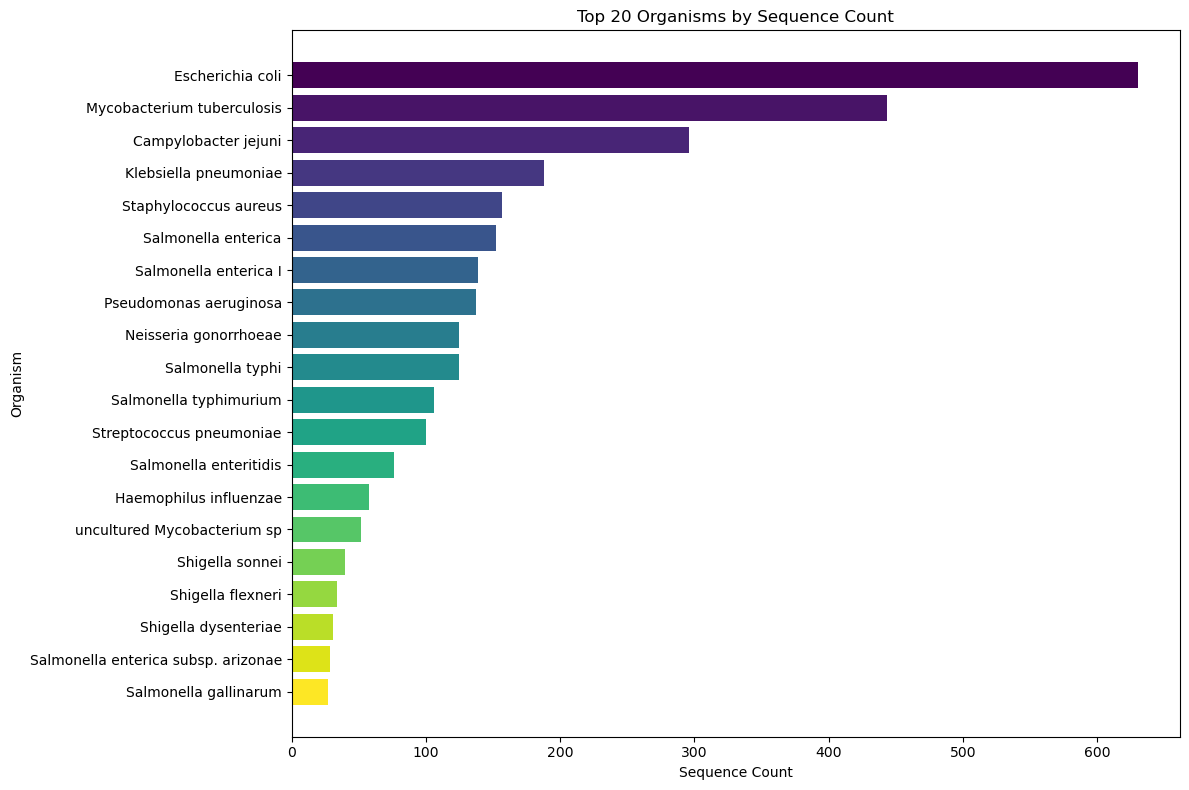

In [17]:
# I forgot to import numpy. Let's correct that and generate the colorful plot again.
import numpy as np
import matplotlib.pyplot as plt
top_organisms = df_counts_new.sort_values('Sequence Count', ascending=False).head(20)

# Generating a colorful palette
colors = plt.cm.viridis(np.linspace(0, 1, 20))

# Re-plotting with the colorful palette
plt.figure(figsize=(12, 8))
plt.barh(top_organisms['Organism'], top_organisms['Sequence Count'], color=colors)
plt.xlabel('Sequence Count')
plt.ylabel('Organism')
plt.title('Top 20 Organisms by Sequence Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the organism with the most sequences on top
plt.tight_layout()

plt.show()


In [18]:
#Split the file because ClustalOmega is annoying and says only 4000 sequences per run
# Let's split the uploaded FASTA file into two files, each containing 4000 sequences or less.
fasta_file_path = 'DNA_Gyrase_UniProt_Cleaned.fasta'

# We'll create two new files for the split
output_file_1 = 'DNA_Gyrase_UniProt_Cleaned_Part1.fasta'
output_file_2 = 'DNA_Gyrase_UniProt_Cleaned_Part2.fasta'

# Initialize variables to keep track of the current sequence count and the current output file
sequence_count = 0
current_output_file = output_file_1

with open(fasta_file_path, 'r') as infile:
    with open(output_file_1, 'w') as outfile1, open(output_file_2, 'w') as outfile2:
        current_outfile = outfile1  # Start writing to the first output file
        for line in infile:
            if line.startswith('>'):  # Each new sequence starts with '>'
                sequence_count += 1
                # If we reach more than 4000 sequences, switch to the second file
                if sequence_count > 4000:
                    current_outfile = outfile2
            current_outfile.write(line)

output_file_1, output_file_2


('DNA_Gyrase_UniProt_Cleaned_Part1.fasta',
 'DNA_Gyrase_UniProt_Cleaned_Part2.fasta')